In [1]:
from portfolio_optimization.data_processing import *
from portfolio_optimization.data_collection import *
from datetime import datetime, timezone, timedelta
from tokens.get_assets import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, plotting

In [2]:
asset_list = get_tickers()
df = get_historical_prices_for_assets(asset_list['medium_risk_tickers'], time_range=timedelta(days=365 * 3))
# Print comprehensive statistical summary
df

High risk tickers: 15
Medium risk tickers: 60
Low risk tickers: 8


,1inch,ach,alpaca,alpha,amp,ape,atom,audio,ava,axs,...,rpl,rune,sand,snx,sushi,trx,vet,xrp,ygg,zrx
2020-07-20,NaN,NaN,NaN,NaN,NaN,NaN,4.191076,NaN,0.423851,NaN,...,NaN,NaN,NaN,3.364206,NaN,0.017549,0.018061,0.199774,NaN,0.421900
2020-07-21,NaN,NaN,NaN,NaN,NaN,NaN,3.893132,NaN,0.499659,NaN,...,NaN,0.541000,NaN,3.881898,NaN,0.017173,0.016188,0.194735,NaN,0.396818
2020-07-22,NaN,NaN,NaN,NaN,NaN,NaN,3.990448,NaN,0.667504,NaN,...,NaN,0.546500,NaN,3.516003,NaN,0.017614,0.017577,0.199176,NaN,0.399892
2020-07-23,NaN,NaN,NaN,NaN,NaN,NaN,4.017305,NaN,0.694343,NaN,...,NaN,0.559148,NaN,3.520454,NaN,0.017982,0.017428,0.204000,NaN,0.399355
2020-07-24,NaN,NaN,NaN,NaN,NaN,NaN,3.971459,NaN,0.913535,NaN,...,NaN,0.539663,NaN,3.334323,NaN,0.017911,0.017396,0.208062,NaN,0.393366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-16,0.367633,0.020085,0.158883,0.105040,0.002144,2.061726,9.700415,0.194741,0.538001,6.315818,...,36.259516,1.034312,0.452514,2.800161,0.677346,0.080830,0.019628,0.712953,0.145239,0.222947
2023-07-17,0.433453,0.019420,0.153647,0.102927,0.002101,1.981753,9.402260,0.188148,0.563600,6.197674,...,35.816083,1.015685,0.441716,2.637095,0.680926,0.079833,0.019414,0.748069,0.143971,0.212843
2023-07-18,0.403776,0.019410,0.151493,0.105935,0.002078,1.978535,9.445650,0.194210,0.539878,6.343404,...,34.843781,1.014518,0.452318,2.651802,0.743776,0.079954,0.019435,0.738984,0.159333,0.222791
2023-07-19,0.359797,0.018301,0.147037,0.103719,0.002046,2.040387,9.275246,0.187835,0.526630,6.285778,...,33.829911,0.986433,0.441496,2.604866,0.721517,0.079781,0.019061,0.776467,0.148316,0.210854


,1inch,ach,alpaca,alpha,amp,ape,atom,audio,ava,axs,...,rpl,rune,sand,snx,sushi,trx,vet,xrp,ygg,zrx
1inch,1.000000,0.219766,0.828867,0.949045,0.745129,0.883844,0.541235,0.758660,0.915330,0.343071,...,-0.136838,0.823009,0.088810,0.894332,0.942308,0.524188,0.839340,0.731197,0.946595,0.960895
ach,0.219766,1.000000,0.311945,0.198193,0.493955,0.316641,0.677504,0.618482,0.252048,0.835443,...,0.815182,0.433220,0.562891,0.029355,0.237001,0.467972,0.442946,0.550329,0.883241,0.248902
alpaca,0.828867,0.311945,1.000000,0.868120,0.734668,0.866337,0.461758,0.767419,0.832474,0.323213,...,-0.078938,0.821318,0.005415,0.829172,0.833597,0.708136,0.847716,0.824639,0.874004,0.818068
alpha,0.949045,0.198193,0.868120,1.000000,0.624332,0.842546,0.478555,0.700508,0.877610,0.246385,...,0.573514,0.715070,0.032567,0.934164,0.947952,0.449014,0.730350,0.624258,0.952662,0.924817
amp,0.745129,0.493955,0.734668,0.624332,1.000000,0.888590,0.633595,0.803209,0.757749,0.599788,...,-0.099173,0.831568,0.354792,0.547412,0.721462,0.577742,0.873308,0.810703,0.929485,0.723319
ape,0.883844,0.316641,0.866337,0.842546,0.888590,1.000000,0.774144,0.872206,0.852561,0.852695,...,0.011927,0.882579,0.886839,0.852441,0.859024,0.093339,0.865479,0.549929,0.846823,0.924470
atom,0.541235,0.677504,0.461758,0.478555,0.633595,0.774144,1.000000,0.734917,0.544604,0.786930,...,0.189645,0.715019,0.646400,0.342691,0.529787,0.623330,0.668740,0.730653,0.807833,0.566843
audio,0.758660,0.618482,0.767419,0.700508,0.803209,0.872206,0.734917,1.000000,0.851739,0.667187,...,0.794341,0.850771,0.360333,0.565964,0.743419,0.712746,0.877450,0.844530,0.966759,0.794836
ava,0.915330,0.252048,0.832474,0.877610,0.757749,0.852561,0.544604,0.851739,1.000000,0.301849,...,-0.096600,0.836108,0.071617,0.823586,0.910413,0.606251,0.882677,0.779520,0.929910,0.934526
axs,0.343071,0.835443,0.323213,0.246385,0.599788,0.852695,0.786930,0.667187,0.301849,1.000000,...,0.020125,0.541577,0.688436,0.068980,0.287300,0.466864,0.525436,0.586382,0.928554,0.325681


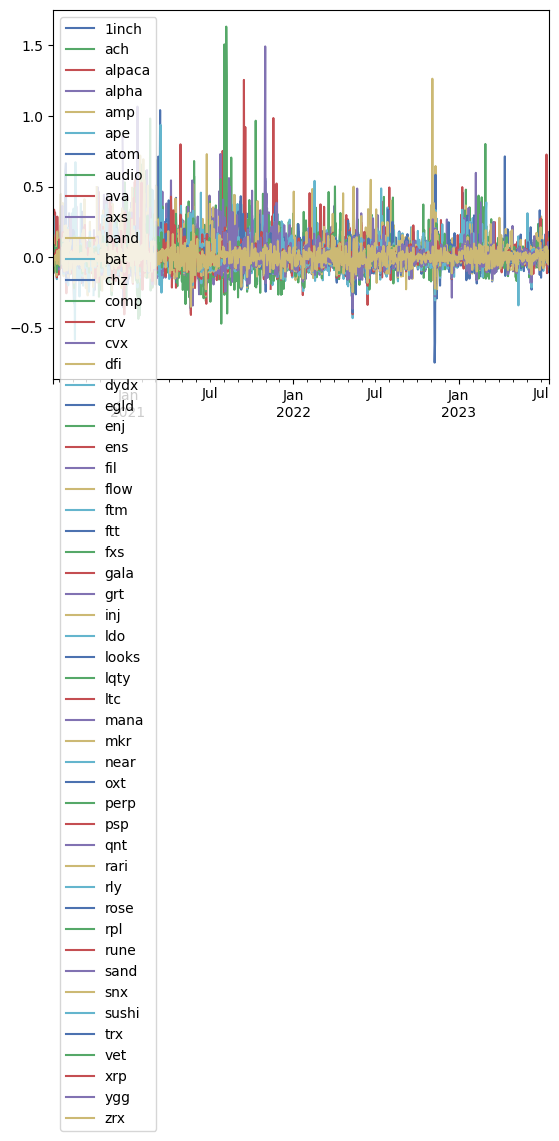

In [3]:
# this will give you the percentage change
df_percentage_variation = df.pct_change()

# plot variation of each asset's price
df_percentage_variation.plot()
pd.DataFrame(df).corr()

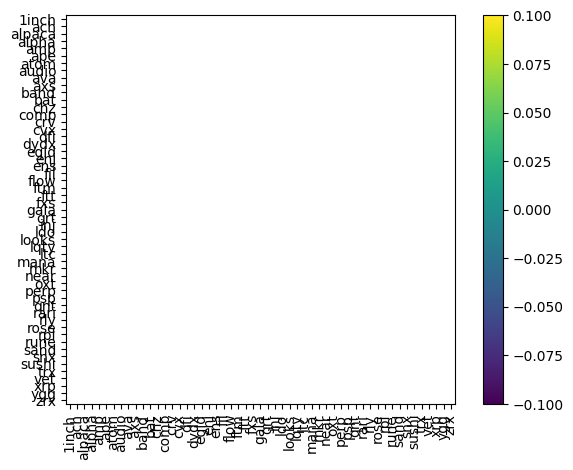

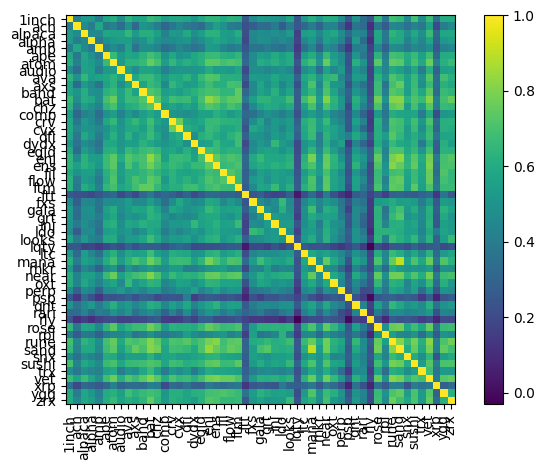

In [4]:
past_df, future_df = df.iloc[:-250], df.iloc[-250:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

In [5]:
rets = expected_returns(df)
rets.tail()

,1inch,ach,alpaca,alpha,amp,ape,atom,audio,ava,axs,...,rpl,rune,sand,snx,sushi,trx,vet,xrp,ygg,zrx
2023-07-16,0.100950,0.008606,0.036382,0.018387,0.005391,0.009830,-0.006085,0.005553,0.011828,-0.010628,...,-0.010858,0.005444,0.006690,0.022300,-0.007823,0.013126,0.007508,-0.010670,0.016638,0.023131
2023-07-17,0.179038,-0.033119,-0.032959,-0.020110,-0.020102,-0.038789,-0.030736,-0.033853,0.047582,-0.018706,...,-0.012229,-0.018009,-0.023864,-0.058234,0.005285,-0.012337,-0.010912,0.049254,-0.008731,-0.045322
2023-07-18,-0.068466,-0.000491,-0.014016,0.029222,-0.010865,-0.001623,0.004615,0.032222,-0.042090,0.023514,...,-0.027147,-0.001149,0.024004,0.005577,0.092301,0.001512,0.001095,-0.012144,0.106698,0.046737
2023-07-19,-0.108919,-0.057140,-0.029411,-0.020917,-0.015086,0.031261,-0.018040,-0.032830,-0.024540,-0.009084,...,-0.029098,-0.027683,-0.023927,-0.017700,-0.029926,-0.002158,-0.019259,0.050722,-0.069145,-0.053579
2023-07-20,-0.067349,-0.011315,0.021889,-0.000798,-0.006549,0.004327,-0.010121,-0.001759,0.027170,0.015963,...,-0.033956,0.010412,-0.000221,0.041833,-0.021255,0.005764,0.002232,0.057089,-0.009579,-0.002700


In [6]:
# exp_cov = risk_models.exp_cov(past_df)
# plotting.plot_covariance(exp_cov, plot_correlation=True)
# plotting.plot_covariance(future_cov, plot_correlation=True)
# plt.show()

HRP Optimization
================

In [7]:
from portfolio_optimization.optimization.hrp import HRPOptimization

hrp = HRPOptimization(df, rets=rets)
hrp_weights = hrp.get_weights()
hrp_weights

1inch     0.01691
ach       0.01132
alpaca    0.02083
alpha     0.01724
amp       0.02245
ape       0.01480
atom      0.01556
audio     0.01193
ava       0.02152
axs       0.01331
band      0.01091
bat       0.01632
chz       0.01137
comp      0.01250
crv       0.00886
cvx       0.01613
dfi       0.03520
dydx      0.01508
egld      0.01735
enj       0.01151
ens       0.01349
fil       0.02136
flow      0.01677
ftm       0.00846
ftt       0.01875
fxs       0.01743
gala      0.01286
grt       0.01170
inj       0.01469
ldo       0.01491
looks     0.00983
lqty      0.01439
ltc       0.01912
mana      0.00928
mkr       0.02916
near      0.01276
oxt       0.01842
perp      0.01653
psp       0.12278
qnt       0.02659
rari      0.01872
rly       0.03435
rose      0.01319
rpl       0.03690
rune      0.01447
sand      0.00749
snx       0.00942
sushi     0.01477
trx       0.03327
vet       0.01321
xrp       0.02833
ygg       0.01151
zrx       0.01399
dtype: float64

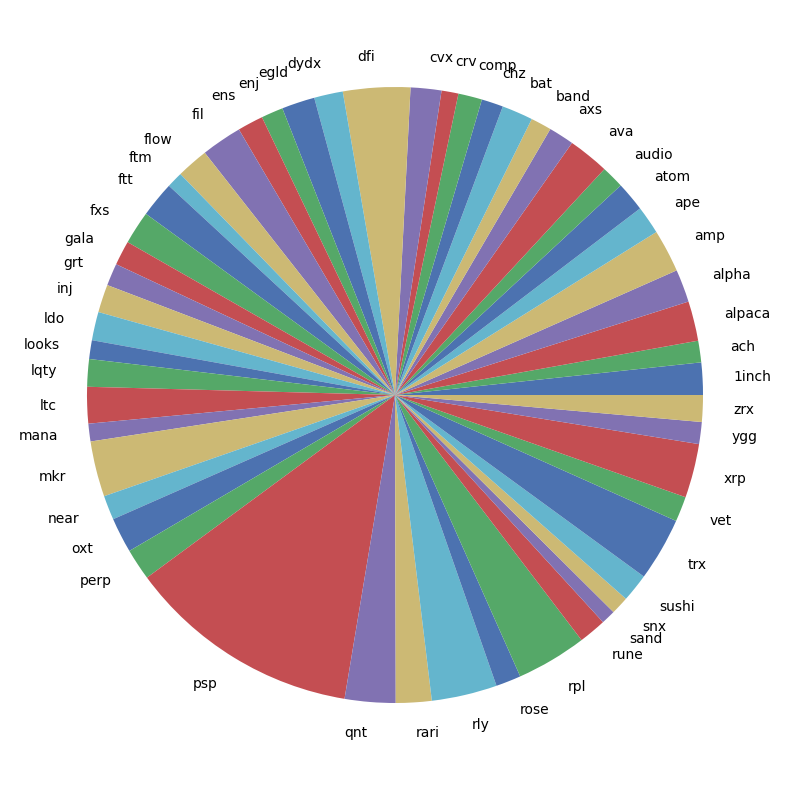

In [8]:
pd.Series(hrp_weights).plot.pie(figsize=(10, 10));

In [9]:
hrp.get_metrics()

{'apy': 0.45314820754310553,
 'annual_volatility': 0.636763670797017,
 'sharpe_ratio': 0.6802338566221084}

# Markowitz optimization

/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/optimization/markowitz.py:124: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


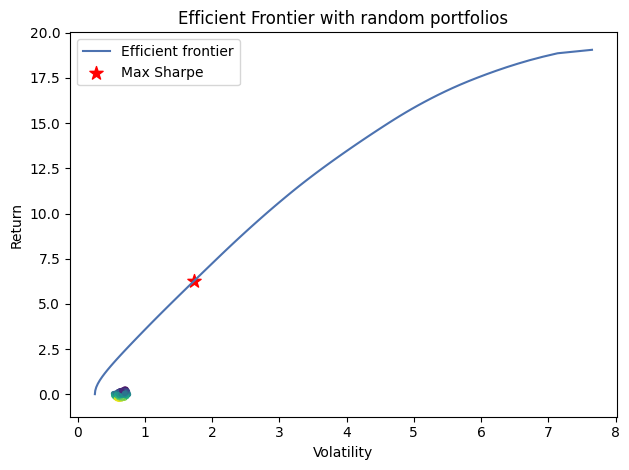

In [10]:
from portfolio_optimization.optimization.markowitz import Markowitz

markowitz = Markowitz(df, weight_bounds=(None, None))

markowitz_weights = markowitz.get_weights()
markowitz.plot_frontier()

1inch    -0.20153
ach       0.04246
alpaca   -0.13906
alpha     0.06869
amp      -0.14359
ape      -0.25554
atom      0.23371
audio    -0.01351
ava      -0.06650
axs       0.80872
band     -0.19445
bat      -0.25659
chz       0.14926
comp     -0.11220
crv      -0.28503
cvx       0.08941
dfi      -0.04041
dydx     -0.05930
egld      0.05256
enj      -0.35977
ens      -0.16040
fil      -0.31442
flow     -0.72194
ftm       0.46141
ftt      -0.06865
fxs       0.09918
gala      0.13537
grt      -0.00058
inj       0.42840
ldo       0.10915
looks    -0.67634
lqty     -0.10919
ltc       0.33305
mana      0.30045
mkr       0.26978
near     -0.14123
oxt      -0.21997
perp     -0.28548
psp       0.58266
qnt       0.56253
rari     -0.17213
rly      -0.23056
rose     -0.00689
rpl       1.00000
rune      0.05048
sand      0.20498
snx       0.10607
sushi    -0.26152
trx       0.73153
vet      -0.18164
xrp       0.10051
ygg      -0.21590
zrx      -0.02603
dtype: float64


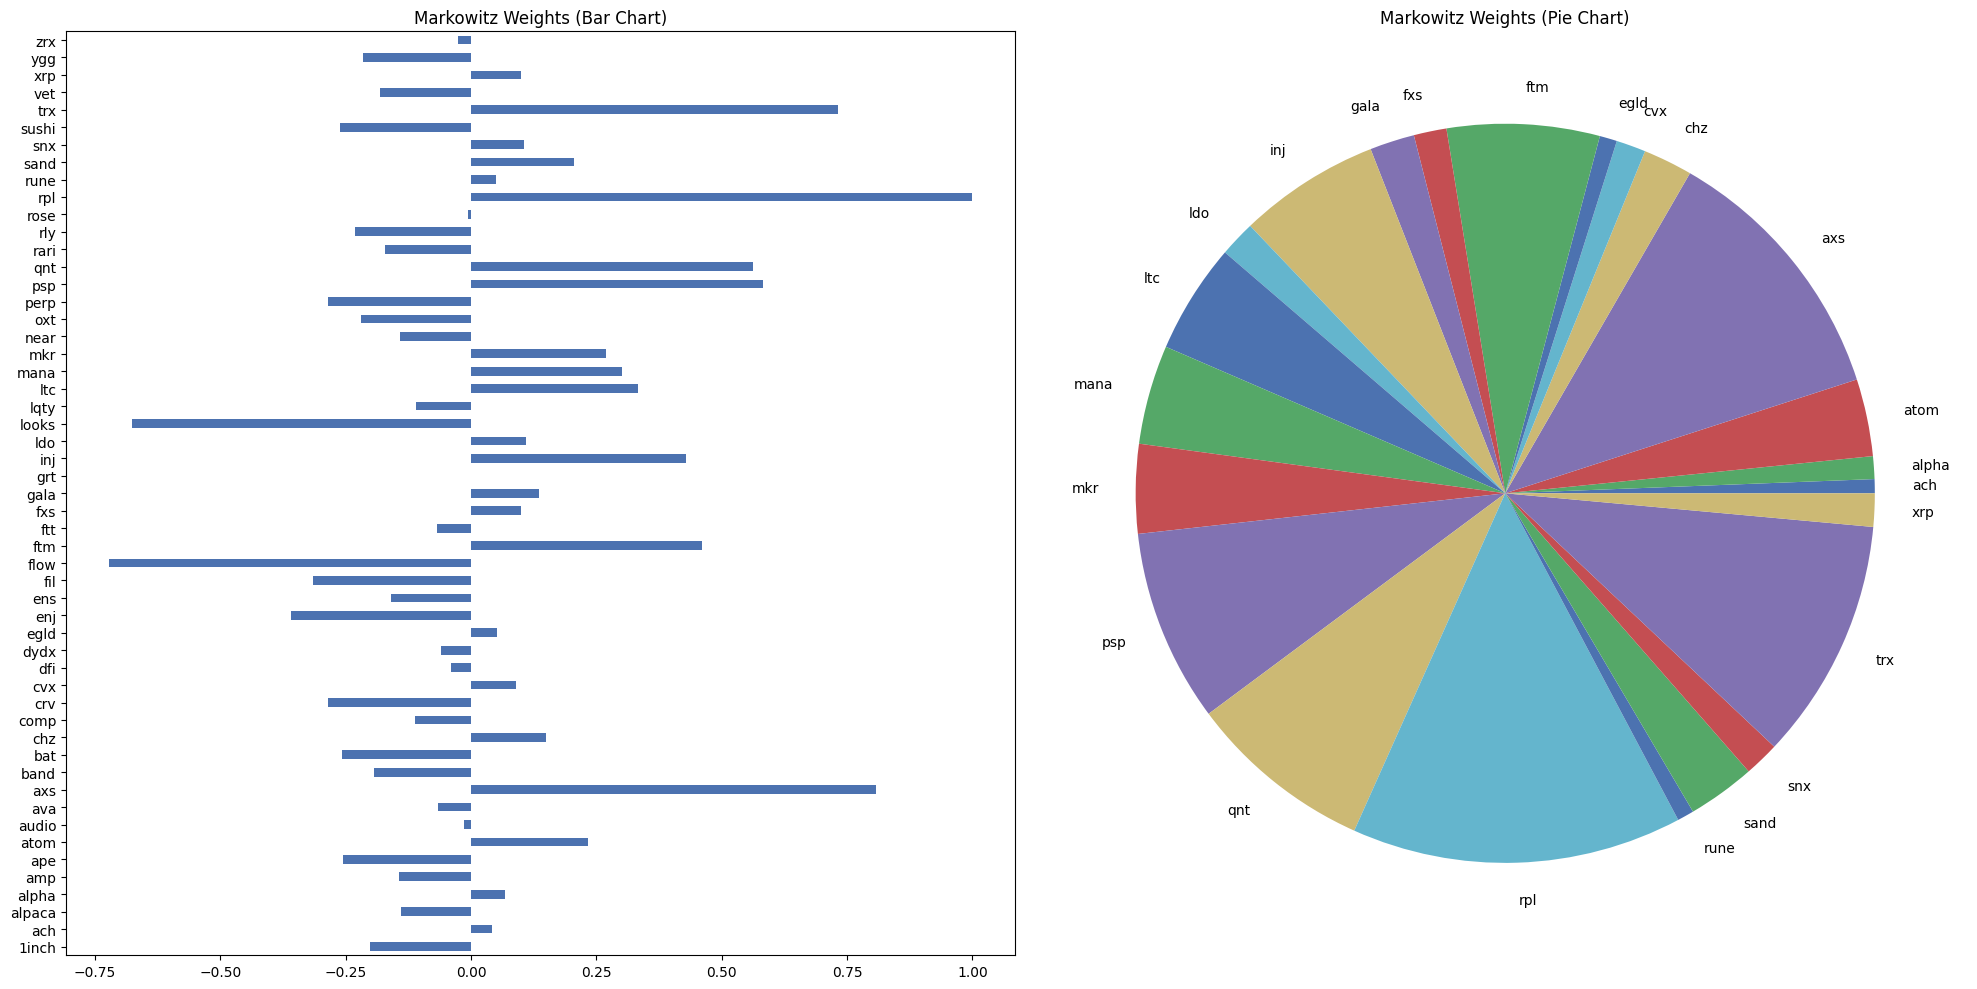

ach      0.04246
alpha    0.06869
atom     0.23371
axs      0.80872
chz      0.14926
cvx      0.08941
egld     0.05256
ftm      0.46141
fxs      0.09918
gala     0.13537
inj      0.42840
ldo      0.10915
ltc      0.33305
mana     0.30045
mkr      0.26978
psp      0.58266
qnt      0.56253
rpl      1.00000
rune     0.05048
sand     0.20498
snx      0.10607
trx      0.73153
xrp      0.10051
dtype: float64

In [11]:
print(markowitz_weights)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Bar chart on the left
pd.Series(markowitz_weights).plot(kind='barh', ax=axes[0], title="Markowitz Weights (Bar Chart)")

# Pie chart on the right without negative values
pd_weights = pd.Series(markowitz_weights)
positive_weights = pd_weights[pd_weights > 0]
positive_weights.plot(kind='pie', ax=axes[1], title="Markowitz Weights (Pie Chart)")

plt.tight_layout()
plt.show()
positive_weights

In [12]:
markowitz.get_metrics()

{'apy': 6.252192882481874,
 'annual_volatility': 1.7267947576744977,
 'sharpe_ratio': 3.6091103790903727}

In [13]:
from portfolio_optimization.portfolio import weight_diff

diffs = weight_diff(markowitz_weights, hrp_weights, threshold=0.05)
print(len(diffs))
diffs

5


[('flow', 'Cover', 0.05759549284529732),
 ('looks', 'Cover', 0.05349907179496375),
 ('axs', 'Sell', 0.062016259376586134),
 ('rpl', 'Sell', 0.07509065690095687),
 ('trx', 'Sell', 0.054441700848989874)]

In [14]:
from portfolio_optimization.portfolio.Portfolio import Portfolio
from portfolio_optimization.backtesting.Backtesting import Backtest
from dateutil.relativedelta import relativedelta

start_date_portfolio = df.index[0] + relativedelta(months=5)

portfolio = Portfolio(
    weights=hrp_weights,
    base_value=1000,
    initial_prices=df.loc[start_date_portfolio],
    optimiser=HRPOptimization,
)

backtest = Backtest(
    portfolio=portfolio,
    start_date=start_date_portfolio,
    end_date=df.index[-1],
    rebalance_frequency="M",
    data=df,
)


portfolio_value, rebalance_dates, portfolio_compositions = backtest.run_backtest(look_back_period=5)
portfolio_value = portfolio_value.dropna()

The condensed distance matrix must contain only finite values.
Skipping rebalance on 2020-12-31 due to insufficient data.
The condensed distance matrix must contain only finite values.
Skipping rebalance on 2021-01-31 due to insufficient data.
The condensed distance matrix must contain only finite values.
Skipping rebalance on 2021-02-28 due to insufficient data.
The condensed distance matrix must contain only finite values.
Skipping rebalance on 2021-03-31 due to insufficient data.
The condensed distance matrix must contain only finite values.
Skipping rebalance on 2021-04-30 due to insufficient data.
The condensed distance matrix must contain only finite values.
Skipping rebalance on 2021-05-31 due to insufficient data.
The condensed distance matrix must contain only finite values.
Skipping rebalance on 2021-06-30 due to insufficient data.
The condensed distance matrix must contain only finite values.
Skipping rebalance on 2021-07-31 due to insufficient data.
The condensed distance m

In [15]:
# from dash import Dash, html, dcc, Input, Output, callback
# import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go

# app = Dash(__name__)

# app.layout = html.Div([
#     html.Div([
#         dcc.Graph(id='portfolio-value-graph')
#     ], style={'display': 'inline-block', 'width': '49%'}),

#     html.Div([
#         dcc.Graph(id='pie-chart-display'),
#     ], style={'display': 'inline-block', 'width': '49%'})
# ])


# @app.callback(
#     Output('portfolio-value-graph', 'figure'),
#     Output('portfolio-value-graph', 'hoverData'),
#     Input('portfolio-value-graph', 'hoverData')
# )
# def update_portfolio_value_graph(hoverData):
#     figure = go.Figure(
#         data=go.Scatter(
#             x=portfolio_value.index, 
#             y=portfolio_value['Portfolio Value'], 
#             name='Portfolio Value',
#             mode='lines+markers'
#         )
#     )

#     # Update first hoverData to the earliest date in portfolio_value (or any default you want)
#     if hoverData is None:
#         hoverData = {'points': [{'x': portfolio_value.index[0]}]}
    
#     return figure, hoverData


# @app.callback(
#     Output('pie-chart-display', 'figure'),
#     Input('portfolio-value-graph', 'hoverData')
# )
# def update_pie_chart(hoverData=None):
#     if hoverData:
#         hoverDate = pd.Timestamp(hoverData['points'][0]['x'])  # Change here
#     else:
#         hoverDate = portfolio_value.index[0]

#     nearest_date = portfolio_compositions.index.asof(hoverDate)  # Find nearest date in portfolio_compositions

#     if pd.isnull(nearest_date):
#         nearest_date = portfolio_compositions.index[0]
        
#     vals = portfolio_compositions.loc[nearest_date]

#     figure = go.Figure(
#         data=go.Pie(
#             labels=list(vals.keys()), 
#             values=list(vals.values()), 
#             name=str(nearest_date.date()),  # Convert timestamp back to date for display
#             hoverinfo='label+percent'
#         )
#     )

#     return figure



# if __name__ == '__main__':
#     app.run_server(debug=True)

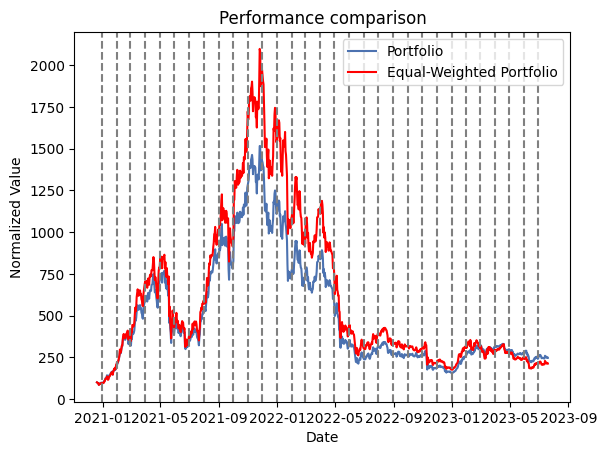

In [16]:
# Calculate the first date of the portfolio
start_date_portfolio = portfolio_value['Portfolio Value'].index.min()

# Normalize prices of each asset at the start date of the portfolio
df_normalized = df / df.loc[start_date_portfolio]

# Calculate the daily equal-weighted return  
df['equal_weighted'] = df_normalized.mean(axis=1)

# Normalize our portfolio and equally-weighted series to 100 at the start date of the portfolio
portfolio_normalized = 100 * portfolio_value['Portfolio Value'] / portfolio_value['Portfolio Value'].loc[start_date_portfolio]
equal_weighted_normalized = 100 * df['equal_weighted'] / df['equal_weighted'].loc[start_date_portfolio]

# Only consider the series after the portfolio start date
equal_weighted_normalized = equal_weighted_normalized[equal_weighted_normalized.index >= start_date_portfolio]
portfolio_normalized = portfolio_normalized[portfolio_normalized.index >= start_date_portfolio]

fig, ax = plt.subplots()

# Plot our normalized portfolio value
ax.plot(portfolio_normalized.index, portfolio_normalized, label='Portfolio')

# Plot the normalized equal-weighted portfolio
ax.plot(equal_weighted_normalized.index, equal_weighted_normalized, label='Equal-Weighted Portfolio', color='red')

# Visualize rebalance dates with vertical lines
for date in rebalance_dates:
    if date >= start_date_portfolio:
        ax.axvline(x=date, color='gray', linestyle='--')

ax.set_xlabel("Date")
ax.set_ylabel("Normalized Value")
ax.legend()
plt.title("Performance comparison")

plt.show()
